In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from tabulate import tabulate
import hvplot.pandas

import statsmodels.api as sm
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve
)

### Set `df_r` for unning 10kph

In [35]:
filePath = "Data Samples\Austin Running 150spm, 10kph.csv"
df_r = pd.read_csv(filePath, header=0, index_col=0)

# Only raw data 
df_r = df_r.iloc[:, :9]
# Simplify Naming convention
df_r.columns = ['AccX', 'AccY', 'AccZ', 'GyrX', 'GyrY', 'GyrZ', 'LinX', 'LinY', 'LinZ']





### Set `df_w` for walking inside 60spm

In [36]:
filePath = "Data Samples\Austin Walking Inside 60spm.csv"
df_w = pd.read_csv(filePath, header=0, index_col=0)

# Only raw data 
df_w = df_w.iloc[:, :9]

# Simplify Naming convention
df_w.columns = ['AccX', 'AccY', 'AccZ', 'GyrX', 'GyrY', 'GyrZ', 'LinX', 'LinY', 'LinZ']

## Data Description

In [40]:
df_w.head()

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,LinX,LinY,LinZ
Time (s),,,,,,,,,
0.0442,2.540,4.86,6.28,-0.896,-0.0751,-1.26,10.90,2.62,1.72
0.0942,1.640,4.20,8.67,-1.020,0.2550,-1.35,10.30,2.84,4.28
0.1440,0.881,4.22,8.18,-0.840,-0.9860,-1.11,9.50,3.57,3.54
0.1940,1.590,4.36,8.98,-0.997,-0.2620,-1.25,10.00,4.43,3.97
0.2440,0.905,4.52,9.10,-0.372,-0.8070,-1.11,9.19,5.27,3.90


In [41]:
df_r.head()

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,LinX,LinY,LinZ
Time (s),,,,,,,,,
0.0459,2.66,4.06,8.37,-0.289,0.566,0.165,-0.0585,-1.430,0.712
0.0959,0.39,4.38,5.61,-0.317,1.630,0.390,-2.0800,-0.979,-2.220
0.1460,1.57,2.17,4.92,-1.200,3.840,0.134,-0.0709,-2.890,-3.320
0.1960,-3.98,3.74,12.80,0.526,2.480,-0.427,-3.7700,-0.826,4.110
0.2460,-1.94,3.73,8.10,0.110,0.966,1.810,-1.3600,-1.080,-0.422


In [37]:
df_w.describe()

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,LinX,LinY,LinZ
count,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000,3109.000000
mean,-1.054145,-9.743004,0.750759,-0.007296,-0.005643,0.046224,0.330873,-0.598239,0.226184
std,1.624220,2.444114,2.111840,0.800500,0.692267,0.430225,2.148518,2.215255,2.539860
min,-13.300000,-23.600000,-5.650000,-4.220000,-4.430000,-4.130000,-12.200000,-14.100000,-7.700000
25%,-1.900000,-10.500000,-0.694000,-0.453000,-0.463000,-0.255000,-0.660000,-1.400000,-1.260000
50%,-1.090000,-9.730000,0.194000,-0.235000,0.033000,-0.018200,0.143000,-0.159000,-0.021500
75%,-0.182000,-8.850000,1.940000,0.123000,0.456000,0.309000,1.580000,0.400000,1.010000
max,6.350000,5.490000,12.200000,3.610000,4.250000,2.210000,10.900000,8.500000,15.400000


In [38]:
df_r.describe()

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,LinX,LinY,LinZ
count,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000
mean,-4.825700,-10.597813,0.326529,-0.042013,0.030029,0.014833,-3.764753,-1.694191,0.040387
std,9.576657,14.603239,6.222889,1.410266,2.085851,2.954645,10.965312,14.568605,6.784775
min,-41.600000,-75.200000,-21.600000,-5.060000,-8.620000,-6.990000,-44.500000,-67.100000,-24.300000
25%,-10.100000,-19.100000,-4.250000,-1.190000,-1.100000,-2.680000,-11.500000,-9.830000,-5.350000
50%,-4.150000,-6.100000,-0.249000,-0.080900,-0.140000,0.349000,-3.290000,2.540000,-0.635000
75%,1.820000,-1.010000,4.340000,1.010000,0.979000,2.430000,4.200000,7.860000,5.230000
max,18.400000,12.200000,45.500000,4.660000,8.620000,7.990000,22.700000,21.700000,42.700000


### Outliers Walking

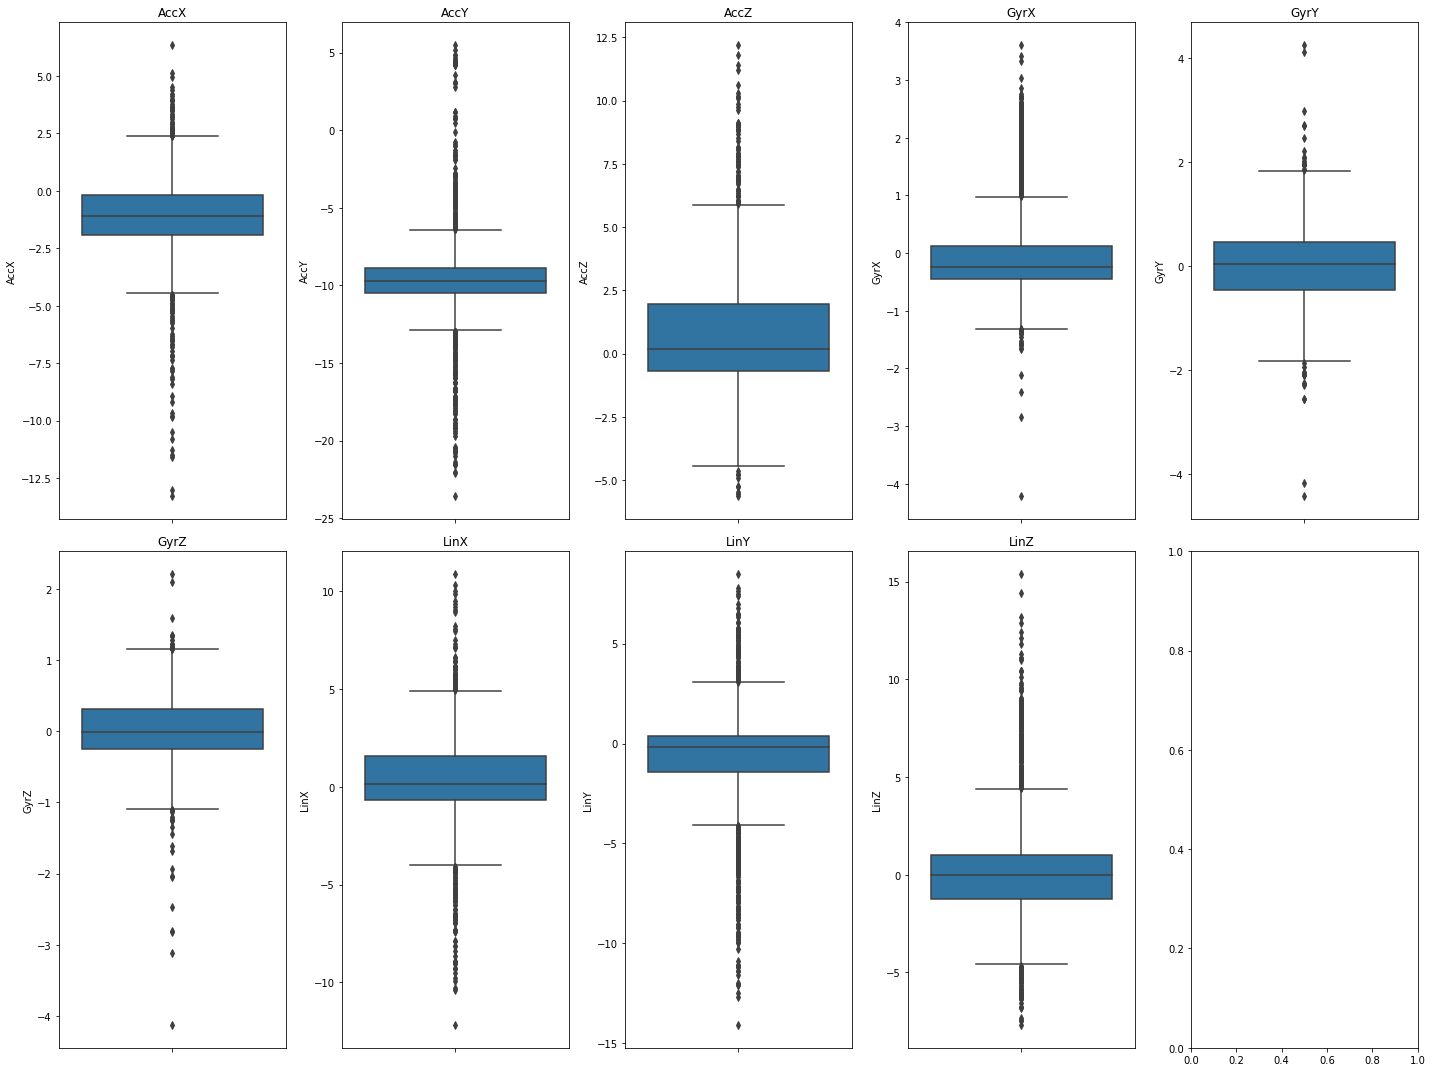

In [43]:
fig, axes = plt.subplots(2, 5, figsize=(20,15))
for i, column in enumerate(df_w):
    row = i // 5  # change here
    col = i % 5   # and here
    ax_curr = axes[row, col]
    sns.boxplot(y=df_w[column], ax=ax_curr)
    ax_curr.set_title(column)

if len(df_w.columns) < 12:
   fig.delaxes(axes.flatten()[len(df_w.columns)])  # deletes the last axes

plt.tight_layout()
plt.show()

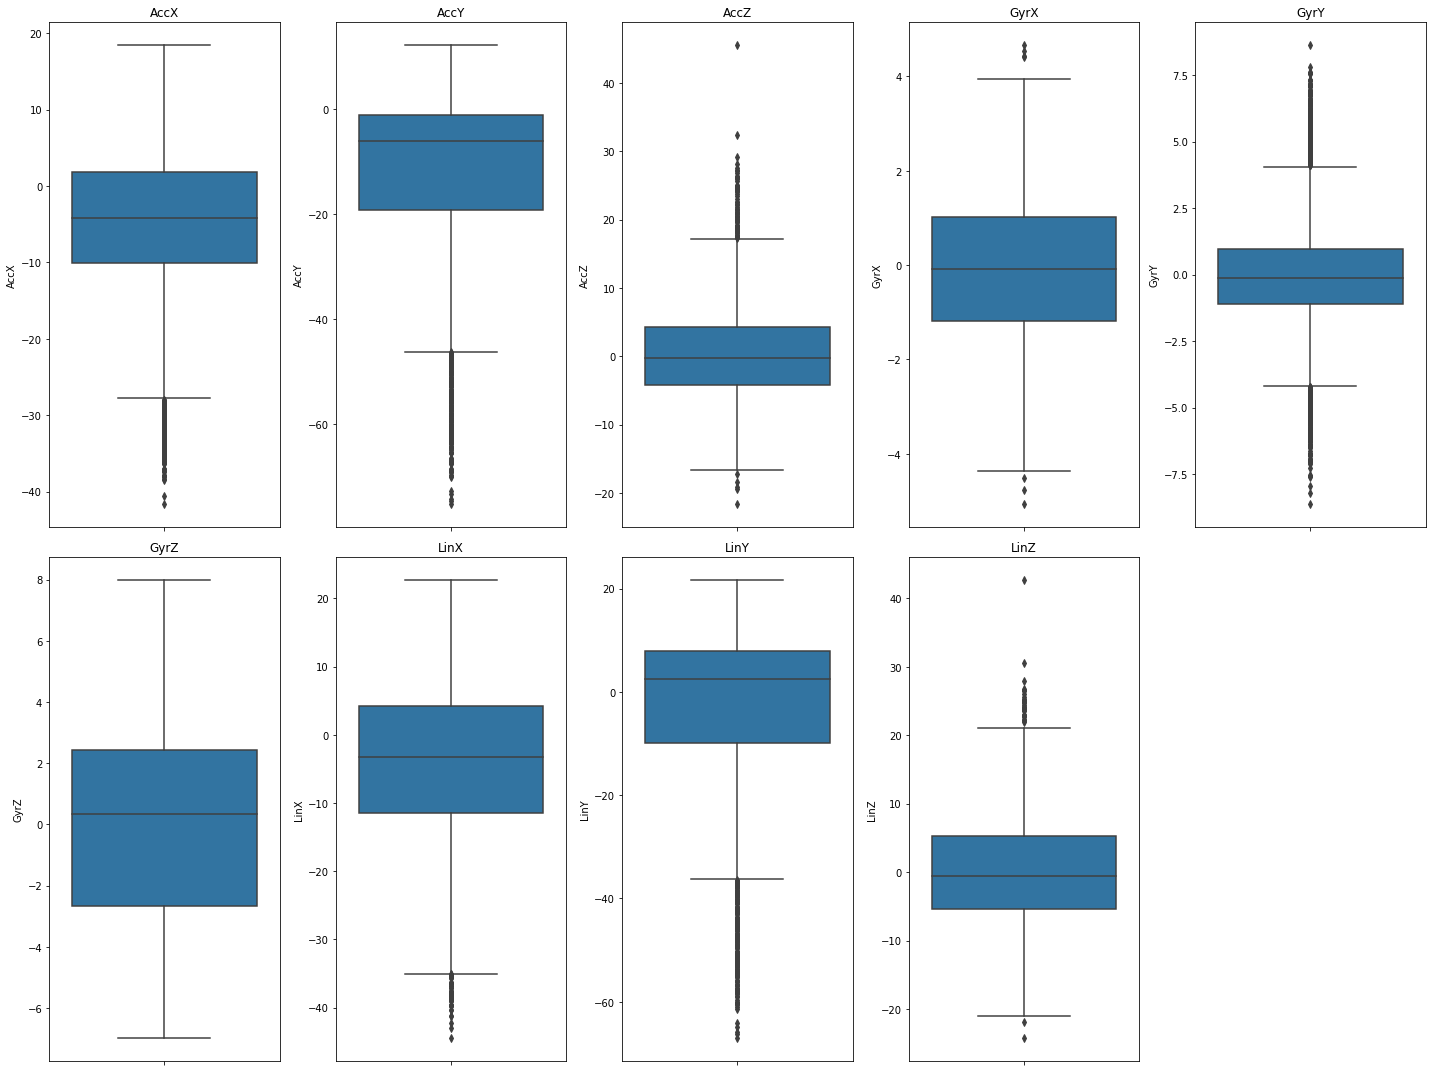

In [45]:
fig, axes = plt.subplots(2, 5, figsize=(20,15))
for i, column in enumerate(df_r.columns):
    row = i // 5  # change here
    col = i % 5   # and here
    ax_curr = axes[row, col]
    sns.boxplot(y=df_r[column], ax=ax_curr)
    ax_curr.set_title(column)

if len(df_r.columns) < 10:
   fig.delaxes(axes.flatten()[len(df_r.columns)])  # deletes the last axes

plt.tight_layout()
plt.show()

### Z- Score for outliers

In [49]:
from scipy.stats import zscore

# Calculate z-scores
z_scores = df_r.apply(zscore)

# For each column, find the boundary for outliers
for col in df_r.columns:
    upper_boundary = df_r[col].mean() + 3*df_r[col].std()
    lower_boundary = df_r[col].mean() - 3*df_r[col].std()
    print(f"For column {col}, values below {lower_boundary} or above {upper_boundary} could be outliers")

# Get boolean mask where any row contains an outlier
outliers_mask = (z_scores < -3) | (z_scores > 3)

# Find the indices where there are outliers
outliers_indices = df_r[outliers_mask.any(axis=1)].index

# # Remove rows with any outliers
# data.drop(outliers_indices)

For column AccX, values below -33.55567158737983 or above 23.904271288720402 could be outliers
For column AccY, values below -54.40753048888624 or above 33.21190354166072 could be outliers
For column AccZ, values below -18.34213691765561 or above 18.9951941245112 could be outliers
For column GyrX, values below -4.272811268237811 or above 4.188784864029429 could be outliers
For column GyrY, values below -6.227523730411514 or above 6.287581354372145 could be outliers
For column GyrZ, values below -8.849101068591034 or above 8.878767611947557 could be outliers
For column LinX, values below -36.66068981784984 or above 29.13118456755288 could be outliers
For column LinY, values below -45.40000660802356 or above 42.01162361124773 could be outliers
For column LinZ, values below -20.313938290453702 or above 20.394712656650885 could be outliers
Float64Index([  2.3,  2.45,   2.5,   2.7,  2.75,   3.0,   3.2,  3.45,   3.8,
                4.0,
              ...
              285.0, 285.0, 285.0, 2

## Rewritten Kalman class for pandas

In [50]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter

# Implements the Kalman filter for dataframe.
class KalmanFilters:

    # Very simple Kalman filter: fill missing values and remove outliers for dataframe.
    # We assume a very simple transition matrix, namely simply a [[1]]. It
    # is however still useful as it is able to dampen outliers and impute missing values. The new
    # values are appended in new columns.
    def apply_kalman_filter(self, df):

        # Initialize the Kalman filter with the trivial transition and observation matrices.
        kf = KalmanFilter(transition_matrices=[[1]], observation_matrices=[[1]])

        # Iterate over the columns in the DataFrame.
        for col in df.columns:
            numpy_array_state = df[col].values
            numpy_array_state = numpy_array_state.astype(np.float32)
            numpy_matrix_state_with_mask = np.ma.masked_invalid(numpy_array_state)

            # Find the best other parameters based on the data (e.g. Q)
            kf = kf.em(numpy_matrix_state_with_mask, n_iter=5)

            # And apply the filter.
            (new_data, filtered_state_covariances) = kf.filter(numpy_matrix_state_with_mask)

            df[col + '_kalman'] = new_data
        return df


In [51]:
df_r = KalmanFilters().apply_kalman_filter(df_r)

## Rewritten FourierTRansformation to Pandas

In [52]:
import numpy as np
import pandas as pd

# This class performs a Fourier transformation on the data to find frequencies that occur
# often and filter noise.
class FourierTransformation:
    
    def __init__(self):
        self.temp_list = []
        self.freqs = None

    def find_fft_transformation(self, series):
        transformation = np.fft.rfft(series, len(series))
        real_ampl = transformation.real
        max_freq = self.freqs[np.argmax(real_ampl[0:len(real_ampl)])]
        freq_weigthed = float(np.sum(self.freqs * real_ampl)) / np.sum(real_ampl)

        PSD = np.divide(np.square(real_ampl), float(len(real_ampl)))
        PSD_pdf = np.divide(PSD, np.sum(PSD))

        if np.count_nonzero(PSD_pdf) == PSD_pdf.size:
            pse = -np.sum(np.log(PSD_pdf) * PSD_pdf)
        else:
            pse = 0

        real_ampl = np.insert(real_ampl, 0, max_freq)
        real_ampl = np.insert(real_ampl, 0, freq_weigthed)
        row = np.insert(real_ampl, 0, pse)

        self.temp_list.append(row)

        return 0

    def abstract_frequency(self, df, window_size, sampling_rate):
        self.freqs = (sampling_rate * np.fft.rfftfreq(int(window_size))).round(3)

        for col in df.columns:
            collist = []
            collist.append(col + '_max_freq')
            collist.append(col + '_freq_weighted')
            collist.append(col + '_pse')
            collist = collist + [col + '_freq_' + str(freq) + '_Hz_ws_' + str(window_size) for freq in self.freqs]
            
            df[col].rolling(window_size + 1).apply(self.find_fft_transformation)

            frequencies = np.pad(np.array(self.temp_list), ((window_size, 0), (0, 0)),
                        'constant', constant_values=np.nan)

            df[collist] = pd.DataFrame(frequencies, index=df.index)

            del self.temp_list[:]

        return df


## Sampling rate

In [56]:
# compute differences between consecutive timestamps
time_diffs = df_r.index.to_series().diff()

# compute the average time difference
avg_time_diff = time_diffs.mean()

# sampling rate is the reciprocal of the average time difference
sampling_rate = 1 / avg_time_diff

print(f"Sampling rate: {sampling_rate} Hz")

Sampling rate: 19.97598948446555 Hz


In [58]:
# Create an instance of the FourierTransformation class
fourier_transform = FourierTransformation()

# Assume we have known values for window_size and sampling_rate
window_size = 10 # replace with actual value
sampling_rate = 20 # replace with actual value

# Call the abstract_frequency method
df_transformed = fourier_transform.abstract_frequency(df_r, window_size, sampling_rate)


c:\Users\Remy\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3641: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[k1] = value[k2]


In [59]:
df_transformed

,AccX,AccY,AccZ,GyrX,GyrY,GyrZ,LinX,LinY,LinZ,AccX_kalman,...,LinY_kalman_freq_10.0_Hz_ws_10,LinZ_kalman_max_freq,LinZ_kalman_freq_weighted,LinZ_kalman_pse,LinZ_kalman_freq_0.0_Hz_ws_10,LinZ_kalman_freq_2.0_Hz_ws_10,LinZ_kalman_freq_4.0_Hz_ws_10,LinZ_kalman_freq_6.0_Hz_ws_10,LinZ_kalman_freq_8.0_Hz_ws_10,LinZ_kalman_freq_10.0_Hz_ws_10
Time (s),,,,,,,,,,,,,,,,,,,,,
0.0459,2.660,4.06,8.37,-0.289,0.566,0.165,-0.0585,-1.430,0.712,1.066201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.0959,0.390,4.38,5.61,-0.317,1.630,0.390,-2.0800,-0.979,-2.220,0.921905,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1460,1.570,2.17,4.92,-1.200,3.840,0.134,-0.0709,-2.890,-3.320,1.132058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.1960,-3.980,3.74,12.80,0.526,2.480,-0.427,-3.7700,-0.826,4.110,-0.766357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.2460,-1.940,3.73,8.10,0.110,0.966,1.810,-1.3600,-1.080,-0.422,-1.223418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294.0000,0.110,4.07,8.10,0.622,0.708,0.145,-3.8100,3.080,-0.700,0.218851,...,-0.602452,1.366197,6.661844,0.0,1.455990,-1.943343,0.576143,0.493711,-0.649046,1.009212
294.0000,-0.491,4.50,7.98,0.639,0.492,0.350,-3.3900,2.460,-1.640,-0.065012,...,-0.336576,1.444304,8.251577,8.0,0.635188,-1.231843,-0.097001,0.797803,0.863557,-0.491013
294.0000,-1.230,5.25,8.51,0.488,0.466,0.387,-3.1000,2.820,-1.210,-0.530881,...,-0.621950,0.790236,10.887901,10.0,-0.282826,-0.080722,-0.217289,0.230660,0.940000,1.634665
